In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [36]:
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [37]:
data= pd.read_csv("../given/practical9/data.csv",)
data.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [38]:
data.shape

(53043, 3)

In [39]:
data.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [40]:
data = data.drop("Unnamed: 0", axis=1)
data =data.dropna()

In [41]:
x = data.drop("status", axis=1)[:20]
y =data["status"][:20]

In [42]:
x=x.dropna()

In [43]:
tokenize=[]
for words in x["statement"]:
    tokenize.append(word_tokenize(words))
x["words"] = tokenize
x.head()

,statement,words
0,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest..."
2,"All wrong, back off dear, forward doubt. Stay ...","[All, wrong, ,, back, off, dear, ,, forward, d..."
3,I've shifted my focus to something else but I'...,"[I, 've, shifted, my, focus, to, something, el..."
4,"I'm restless and restless, it's been a month n...","[I, 'm, restless, and, restless, ,, it, 's, be..."


In [44]:
no_punct=[]
for wordArr in x["statement"]:
    no_punct.append(RegexpTokenizer("[a-z|A-Z]+").tokenize(wordArr.lower()))
x["no_punct"]=no_punct
x.head()

,statement,words,no_punct
0,oh my gosh,"[oh, my, gosh]","[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...","[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ..."
3,I've shifted my focus to something else but I'...,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els..."
4,"I'm restless and restless, it's been a month n...","[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a..."


In [45]:
no_stop_words=[]
for wordArr in x["no_punct"]:
    temp =[]
    for word in wordArr:
        if word not in stopwords.words("english"):
            temp.append(word)
    no_stop_words.append(temp)

x["no_stop_words"] = no_stop_words
x.head()

,statement,words,no_punct,no_stop_words
0,oh my gosh,"[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...","[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]"
4,"I'm restless and restless, it's been a month n...","[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]"


In [46]:
lemmatize=[]
for wordArr in x["no_stop_words"]:
    temp=[]
    for word in wordArr:
        temp.append(WordNetLemmatizer().lemmatize(word))
    lemmatize.append(temp)
x["lemmatize"] = lemmatize
x.head()

,statement,words,no_punct,no_stop_words,lemmatize
0,oh my gosh,"[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]","[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...","[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]"
4,"I'm restless and restless, it's been a month n...","[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]"


In [48]:
pos_tag=[]
for wordArr in x["lemmatize"]:
    pos_tag.append(nltk.pos_tag(wordArr))
x["pos_tag"] = pos_tag
x.head()

,statement,words,no_punct,no_stop_words,lemmatize,pos_tag
0,oh my gosh,"[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[(oh, UH), (gosh, NN)]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[(trouble, NN), (sleeping, VBG), (confused, VB..."
2,"All wrong, back off dear, forward doubt. Stay ...","[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[(wrong, JJ), (back, RB), (dear, JJ), (forward..."
3,I've shifted my focus to something else but I'...,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[(shifted, VBN), (focus, NN), (something, NN),..."
4,"I'm restless and restless, it's been a month n...","[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[(restless, JJ), (restless, JJ), (month, NN), ..."


In [50]:
noun_tag=[]
for wordArr in x["pos_tag"]:
    temp=[]
    for word,pos in wordArr:
        if(pos.startswith("NN")):
            temp.append(word)
    noun_tag.append(temp)
x["noun_tag"]= noun_tag
x.head()
        

,statement,words,no_punct,no_stop_words,lemmatize,pos_tag,noun_tag
0,oh my gosh,"[oh, my, gosh]","[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[(oh, UH), (gosh, NN)]",[gosh]
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, ,, confused, mind, ,, rest...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[(trouble, NN), (sleeping, VBG), (confused, VB...","[trouble, mind, heart, tune]"
2,"All wrong, back off dear, forward doubt. Stay ...","[All, wrong, ,, back, off, dear, ,, forward, d...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[(wrong, JJ), (back, RB), (dear, JJ), (forward...","[forward, doubt, restless, place]"
3,I've shifted my focus to something else but I'...,"[I, 've, shifted, my, focus, to, something, el...","[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[(shifted, VBN), (focus, NN), (something, NN),...","[focus, something]"
4,"I'm restless and restless, it's been a month n...","[I, 'm, restless, and, restless, ,, it, 's, be...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[(restless, JJ), (restless, JJ), (month, NN), ...","[month, mean]"


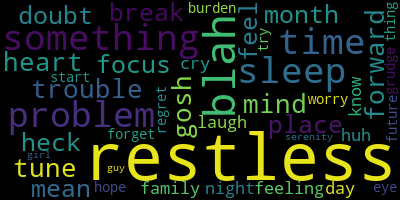

<Figure size 1000x1000 with 0 Axes>

In [52]:
wordList = x["noun_tag"].map(lambda x:",".join(x))
words= ",".join(wordList)

wc= WordCloud(background_color="black", max_words=500, contour_color="blue")
wc.generate(words)
plt.figure(figsize=(10,10))
wc.to_image()

In [54]:
vectors = CountVectorizer().fit_transform(wordList)
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

In [64]:
x_tr, x_test, y_tr, y_test = train_test_split(vectors,LabelEncoder().fit_transform(y), test_size=0.3)

In [65]:
model = LogisticRegression().fit(x_tr, y_tr)
predTrain = model.predict(x_tr)
predTest = model.predict(x_test)

print(confusion_matrix(y_test, predTest))
print(classification_report(y_test, predTest))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0


# again 

In [70]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

In [71]:
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/aadityapal/.conda/envs/notebook/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [75]:
data= pd.read_csv("../given/practical9/data.csv")
data.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [76]:
data = data.drop("Unnamed: 0", axis=1)
data.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [78]:
data =data.dropna()
x = data.drop("status", axis=1)[:20]
y = data["status"][:20]

In [81]:
tokenize=[]
for stat in x["statement"]:
    tokenize.append(RegexpTokenizer("[a-z|A-Z]+").tokenize(stat.lower()))
x["tokenize"] = tokenize
x.head()

,statement,tokenize
0,oh my gosh,"[oh, my, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...","[all, wrong, back, off, dear, forward, doubt, ..."
3,I've shifted my focus to something else but I'...,"[i, ve, shifted, my, focus, to, something, els..."
4,"I'm restless and restless, it's been a month n...","[i, m, restless, and, restless, it, s, been, a..."


In [84]:
no_stop_words=[]
for wordArr in x["tokenize"]:
    temp=[]
    for word in wordArr:
        if word not in stopwords.words("english"):
            temp.append(word)
    no_stop_words.append(temp)

x["no_stopwords"] = no_stop_words
x.head()

,statement,tokenize,no_stop_words,no_stopwords
0,oh my gosh,"[oh, my, gosh]","[oh, gosh]","[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,"[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]"
4,"I'm restless and restless, it's been a month n...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]"


In [85]:
lemmatize =[]
for wordArr in x["no_stopwords"]:
    temp=[]
    for word in wordArr:
        temp.append(WordNetLemmatizer().lemmatize(word))
    lemmatize.append(temp)
x["lemmatize"] = lemmatize
x.head()

,statement,tokenize,no_stop_words,no_stopwords,lemmatize
0,oh my gosh,"[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,"[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]"
4,"I'm restless and restless, it's been a month n...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]"


In [87]:
pos_tag=[]
for wordArr in x["lemmatize"]:
    pos_tag.append(nltk.pos_tag(wordArr))
x["pos_tag"]= pos_tag
x.head()

,statement,tokenize,no_stop_words,no_stopwords,lemmatize,pos_tag
0,oh my gosh,"[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[oh, gosh]","[(oh, UH), (gosh, NN)]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[(trouble, NN), (sleeping, VBG), (confused, VB..."
2,"All wrong, back off dear, forward doubt. Stay ...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[(wrong, JJ), (back, RB), (dear, JJ), (forward..."
3,I've shifted my focus to something else but I'...,"[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[(shifted, VBN), (focus, NN), (something, NN),..."
4,"I'm restless and restless, it's been a month n...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[(restless, JJ), (restless, JJ), (month, NN), ..."


In [90]:
noun_tag =[]
for wordArr in x["pos_tag"]:
    temp=[]
    for word, pos in wordArr:
        #print(word)
        if(pos.startswith("NN")):
            temp.append(word)
    noun_tag.append(temp)
x["noun_tag"]=noun_tag
x.head()
    

,statement,tokenize,no_stop_words,no_stopwords,lemmatize,pos_tag,noun_tag
0,oh my gosh,"[oh, my, gosh]","[oh, gosh]","[oh, gosh]","[oh, gosh]","[(oh, UH), (gosh, NN)]",[gosh]
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[trouble, sleeping, confused, mind, restless, ...","[(trouble, NN), (sleeping, VBG), (confused, VB...","[trouble, mind, heart, tune]"
2,"All wrong, back off dear, forward doubt. Stay ...","[all, wrong, back, off, dear, forward, doubt, ...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[wrong, back, dear, forward, doubt, stay, rest...","[(wrong, JJ), (back, RB), (dear, JJ), (forward...","[forward, doubt, restless, place]"
3,I've shifted my focus to something else but I'...,"[i, ve, shifted, my, focus, to, something, els...","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[shifted, focus, something, else, still, worried]","[(shifted, VBN), (focus, NN), (something, NN),...","[focus, something]"
4,"I'm restless and restless, it's been a month n...","[i, m, restless, and, restless, it, s, been, a...","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[restless, restless, month, boy, mean]","[(restless, JJ), (restless, JJ), (month, NN), ...","[month, mean]"


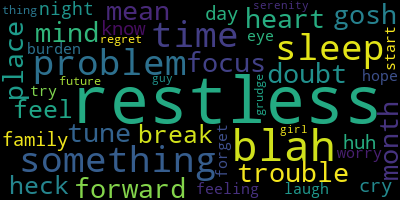

<Figure size 1000x1000 with 0 Axes>

In [93]:
wordList = x["noun_tag"].map(lambda x: ",".join(x))
words = ",".join(wordList)

wc =WordCloud(background_color="black",max_words=500, contour_color="blue").generate(words)
plt.figure(figsize=(10,10))
wc.to_image()

In [94]:
vec = CountVectorizer().fit_transform(wordList)
vec.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],

In [96]:
x_tr, x_test, y_tr, y_test = train_test_split(vec, y, test_size=0.2)
model = LogisticRegression().fit(x_tr,y_tr)
predTest = model.predict(x_test)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Anxiety'